In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, exp
import matplotlib.pyplot as plt
import pprint
import matplotlib.patches as mpatches
import seaborn as sns
import statistics
from cycler import cycler

#  _Preprocessing Data_
<hr style="border:1.5px solid black">

In [2]:
# Expand the number of visible columns of dataframe
pd.set_option('display.max_columns', None)

# Read Data
Human_driven_vehicles = pd.read_csv('AstaZero_Human_driven_vehicles.csv', header=None, low_memory=False)
ACC_engaged_vehicles = pd.read_csv('AstaZero_ACC-engaged_vehicles.csv', header=None, low_memory=False)

# Process data
def process_data(df): # df for Dataframe
    
    # Handle first rows of data (csv Metadata information) and columns with None values 
    df = df.loc[5:, 0:44] 
    df.reset_index(drop=True, inplace=True)
    
    # Header
    df.columns = df.iloc[0]
    df = df.iloc[1:].reset_index(drop=True)
    
    # Drop unnecessary columns 
    df = df.drop(columns={'Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5'})
    df = df.astype('float64')
    
    list_vehicles = ['1', '2', '3', '4', '5']
    # Calculate distance covered (trajectory) as sum of raw speeds (Doppler)     
    for i in list_vehicles:
        df['Traj{}'.format(i)] = df['Speed{}'.format(i)].cumsum().multiply(0.1)

    # Calculate acceleration 
    for i in list_vehicles:
        df['Acc{}'.format(i)] = df['Speed{}'.format(i)].diff().multiply(10)
    
    # Calculate road gradient in degrees
    for i in list_vehicles:
        df['Gradient{}'.format(i)] = np.degrees(np.arcsin(
            df['Alt{}'.format(i)].diff() 
            / (np.sqrt((df['Traj{}'.format(i)].diff())**2 + (df['Alt{}'.format(i)].diff())**2))
        ))    
    
    # Calcute time-gaps
    df['Time_gap12'] = df['IVS1'] / df['Speed2']
    df['Time_gap23'] = df['IVS2'] / df['Speed3']
    df['Time_gap34'] = df['IVS3'] / df['Speed4']
    df['Time_gap45'] = df['IVS4'] / df['Speed5']
    
    return df

# Processed Dataframes
HUMAN = process_data(Human_driven_vehicles)
ACC = process_data(ACC_engaged_vehicles)

# Fill NA/NaN values with zeros
HUMAN = HUMAN.fillna(0)
ACC = ACC.fillna(0)

ACC # Pandas dataframe for ACC-engaged vehicles

,Time,Speed1,Lat1,Lon1,Alt1,E1,N1,U1,Speed2,Lat2,Lon2,Alt2,E2,N2,U2,Speed3,Lat3,Lon3,Alt3,E3,N3,U3,Speed4,Lat4,Lon4,Alt4,E4,N4,U4,Speed5,Lat5,Lon5,Alt5,E5,N5,U5,IVS1,IVS2,IVS3,IVS4,Traj1,Traj2,Traj3,Traj4,Traj5,Acc1,Acc2,Acc3,Acc4,Acc5,Gradient1,Gradient2,Gradient3,Gradient4,Gradient5,Time_gap12,Time_gap23,Time_gap34,Time_gap45
0,1.0,0.021111,1.008436,0.223006,192.218920,472.214990,-228.464546,188.875555,0.012222,1.008435,0.223007,192.273075,473.967851,-237.226205,188.929260,0.020000,1.008434,0.223007,192.650174,475.534972,-244.653765,189.305963,0.011111,1.008433,0.223008,192.668718,476.850509,-251.005375,189.324162,0.011111,1.008432,0.223008,192.908357,478.101945,-256.772735,189.563478,4.090278,2.857081,1.762416,1.992571,0.002111,0.001222,0.002000,0.001111,0.001111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.659131,142.854048,158.617427,179.331362
1,1.1,0.013636,1.008436,0.223006,192.219589,472.213988,-228.464544,188.876224,0.013636,1.008435,0.223007,192.273417,473.967867,-237.226204,188.929602,0.018182,1.008434,0.223007,192.650120,475.534701,-244.653259,189.305909,0.012727,1.008433,0.223008,192.668718,476.850521,-251.005375,189.324162,0.011818,1.008432,0.223008,192.908356,478.102198,-256.772735,189.563477,4.090479,2.856527,1.762969,1.992622,0.003475,0.002586,0.003818,0.002384,0.002293,-0.074747,0.014141,-0.018182,0.016162,0.007071,26.139799,14.081051,-1.707411,-0.003318,-0.037074,299.968424,157.109012,138.518974,168.606443
2,1.2,0.024444,1.008436,0.223006,192.220113,472.213484,-228.464543,188.876748,0.015556,1.008435,0.223007,192.273604,473.967527,-237.226204,188.929789,0.010000,1.008434,0.223007,192.649910,475.534771,-244.653518,189.305699,0.013333,1.008433,0.223008,192.668718,476.850443,-251.005375,189.324162,0.012222,1.008432,0.223008,192.908353,478.102606,-256.771869,189.563474,4.090512,2.856866,1.762685,1.991878,0.005919,0.004141,0.004818,0.003717,0.003515,0.108081,0.019192,-0.081818,0.006061,0.004040,12.092554,6.857278,-11.848148,0.011808,-0.135479,262.961472,285.686620,132.201372,162.971856
3,1.3,0.020909,1.008436,0.223006,192.220891,472.212219,-228.464541,188.877526,0.016364,1.008435,0.223007,192.274012,473.967117,-237.225494,188.930197,0.016364,1.008434,0.223007,192.650174,475.535026,-244.653765,189.305963,0.010000,1.008433,0.223008,192.668719,476.850088,-251.005375,189.324163,0.013636,1.008432,0.223008,192.908351,478.102738,-256.771216,189.563473,4.089986,2.857940,1.762320,1.991344,0.008010,0.005778,0.006455,0.004717,0.004879,-0.035354,0.008081,0.063636,-0.033333,0.014141,20.410596,13.998428,9.158756,0.058271,-0.068006,249.943567,174.651869,176.231970,146.031868
4,1.4,0.013333,1.008436,0.223006,192.221637,472.211056,-228.463673,188.878272,0.012222,1.008435,0.223007,192.274528,473.966679,-237.224593,188.930713,0.020000,1.008434,0.223007,192.650171,475.535435,-244.652651,189.305959,0.012222,1.008433,0.223008,192.668653,476.849979,-251.005376,189.324097,0.012222,1.008432,0.223008,192.908350,478.102738,-256.770508,189.563471,4.090095,2.857907,1.763306,1.990674,0.009343,0.007000,0.008455,0.005939,0.006101,-0.075758,-0.041414,0.036364,0.022222,-0.014141,29.226455,22.876505,-0.098195,-3.074887,-0.065644,334.644167,142.895333,144.270476,162.873334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,1247.5,0.021818,1.008436,0.223006,192.197514,471.907815,-226.954373,188.854225,0.015455,1.008435,0.223007,192.227357,473.500626,-234.932130,188.883661,0.015455,1.008434,0.223007,192.639723,475.301795,-243.819617,189.295561,0.013636,1.008433,0.223008,192.677771,476.998994,-251.616180,189.333180,0.007273,1.008431,0.223008,192.962173,478.483497,-258.808507,189.617183,3.290210,4.334166,3.255153,3.434931,23073.574240,23073.701463,23069.870404,23069.281708,23059.571355,0.073737,0.010101,0.021212

# _Tractive Energy Consumption_
<hr style="border:1.5px solid black">

In [3]:
# Calculate Tractive power per vehicle (Platoon normalization: same parameters for all vehicles)
def tractive_power(df):
    
    f0 = 213 # in N 
    f1 = 0.31*(1000/3600) # in N*s/m
    f2 = 0.035*(1000/3600)**2 # in N*s^2/m^2
    m = 1560 # in kg
    
    list_vehicles = ['1', '2', '3', '4', '5']
    # Calculate tractive power
    for i in list_vehicles:
        df['Tr_power{}'.format(i)] = (f0 
                                      + f1*df['Speed{}'.format(i)] 
                                      + f2*df['Speed{}'.format(i)]**2 
                                      + 1.03*m*df['Acc{}'.format(i)] 
                                      + m*9.81*np.sin((np.pi / 180)*df['Gradient{}'.format(i)])
                                     )*df['Speed{}'.format(i)]*0.001
                
        # Turn negative values of tractive power into zero
        for j in range(df[df.columns[0]].count()):
            if df['Tr_power{}'.format(i)].values[j] < 0:
                df.loc[j, 'Tr_power{}'.format(i)] = 0             
    
    return

tractive_power(HUMAN)
tractive_power(ACC)

# Calculate Τractive energy consumption per vehicle
Tractive_energy_per_vehicle = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
                               'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
        Tractive_energy_per_vehicle['HUMAN']['C{}'.format(i)] = \
        ((HUMAN.loc[:, 'Tr_power{}'.format(i)].sum())*0.1) \
        / (0.036*(HUMAN.loc[:, 'Speed{}'.format(i)].sum())*0.1)

for i in list_vehicles:
        Tractive_energy_per_vehicle['ACC']['C{}'.format(i)] = \
        ((ACC.loc[:, 'Tr_power{}'.format(i)].sum())*0.1) \
        / (0.036*(ACC.loc[:, 'Speed{}'.format(i)].sum())*0.1)   

In [4]:
# Customize Matplotlib
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16 
plt.rcParams['hatch.linewidth']= 1.5
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.loc'] = 'upper left'

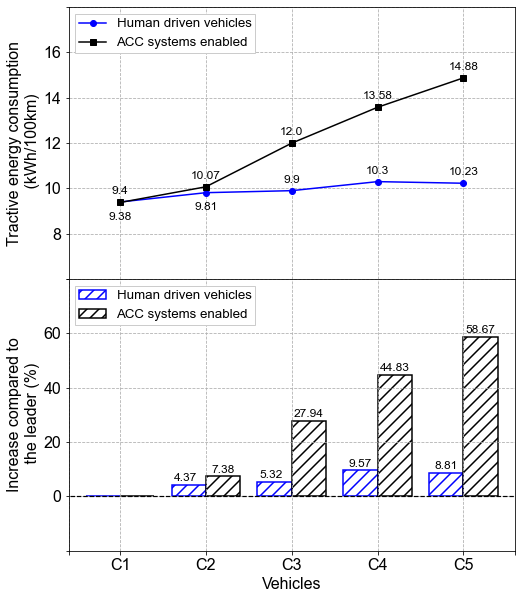

In [5]:
# Lists
HUMAN_tr_energy = sorted(Tractive_energy_per_vehicle['HUMAN'].items())
ACC_tr_energy = sorted(Tractive_energy_per_vehicle['ACC'].items())
x, y1 = zip(*HUMAN_tr_energy)
x, y2 = zip(*ACC_tr_energy)

# Plot Tractive energy consumption values
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(8, 10, forward=True) # (6, 8)
fig.subplots_adjust(hspace=0)

ax1.plot(x, y1, 'o-', label='Human driven vehicles', color='b')
ax1.plot(x, y2, 's-', label='ACC systems enabled', color='k')
ax1.set_ylim([6, 18])
ax1.set_yticks([6, 8, 10, 12, 14, 16, 18])
ax1.set_yticklabels(['', '8', '10', '12', '14', '16', ''])
ax1.set_ylabel('Tractive energy consumption\n (kWh/100km)')
ax1.set_xlim([-0.6,4.6])

ax1.annotate(str(round(Tractive_energy_per_vehicle['HUMAN']['C1'], 2)), 
             ('C1',Tractive_energy_per_vehicle['HUMAN']['C1']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['HUMAN']['C2'], 2)), 
             ('C2',Tractive_energy_per_vehicle['HUMAN']['C2']-0.8), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['HUMAN']['C3'], 2)), 
             ('C3',Tractive_energy_per_vehicle['HUMAN']['C3']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['HUMAN']['C4'], 2)), 
             ('C4',Tractive_energy_per_vehicle['HUMAN']['C4']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['HUMAN']['C5'], 2)), 
             ('C5',Tractive_energy_per_vehicle['HUMAN']['C5']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['ACC']['C1'], 2)), 
             ('C1',Tractive_energy_per_vehicle['ACC']['C1']-0.8), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['ACC']['C2'], 2)), 
             ('C2',Tractive_energy_per_vehicle['ACC']['C2']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['ACC']['C3'], 2)), 
             ('C3',Tractive_energy_per_vehicle['ACC']['C3']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['ACC']['C4'], 2)), 
             ('C4',Tractive_energy_per_vehicle['ACC']['C4']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(Tractive_energy_per_vehicle['ACC']['C5'], 2)), 
             ('C5',Tractive_energy_per_vehicle['ACC']['C5']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax1.grid()
ax1.legend()

# Plot increases compared to the leader
Tractive_energy_perc = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
                        'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    Tractive_energy_perc['HUMAN']['C{}'.format(i)] = \
    ((Tractive_energy_per_vehicle['HUMAN']['C{}'.format(i)] - Tractive_energy_per_vehicle['HUMAN']['C1']) \
     / Tractive_energy_per_vehicle['HUMAN']['C1'])*100
    Tractive_energy_perc['ACC']['C{}'.format(i)] = \
    ((Tractive_energy_per_vehicle['ACC']['C{}'.format(i)] - Tractive_energy_per_vehicle['ACC']['C1']) \
     / Tractive_energy_per_vehicle['ACC']['C1'])*100
    
HUMAN_tr_en_perc = Tractive_energy_perc['HUMAN'].values()
ACC_tr_en_perc = Tractive_energy_perc['ACC'].values()
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.4
opacity = 1
ax2.bar(index, HUMAN_tr_en_perc, bar_width, alpha=opacity, hatch='//', color='none', edgecolor='b', 
        label='Human driven vehicles', linewidth=1.5)
ax2.bar(index + bar_width, ACC_tr_en_perc, bar_width, alpha=opacity,  hatch='//', color='none', edgecolor='k', 
        label='ACC systems enabled', linewidth=1.5)

ax2.set_ylim([-10, 70])
ax2.set_yticks([-20, 0, 20, 40, 60, 80])
ax2.set_yticklabels(['', '0', '20', '40', '60', ''])
ax2.set_ylabel('Increase compared to\n the leader (%)')
ax2.set_xlim([-0.15, 4.5])
ax2.set_xticks([-0.4, 0 + bar_width/2, 1 + bar_width/2, 2 + bar_width/2, 3 + bar_width/2, 4 + bar_width/2, 4.8])
ax2.set_xticklabels(['', 'C1', 'C2', 'C3', 'C4', 'C5', ''])
ax2.set_xlabel('Vehicles')
ax2.hlines(0, -0.6, 5, color='k', linestyle='dashed', linewidth=1.2)

ax2.annotate(str(round(Tractive_energy_perc['HUMAN']['C2'], 2)), (0.96, Tractive_energy_perc['HUMAN']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(Tractive_energy_perc['HUMAN']['C3'], 2)), (1.96, Tractive_energy_perc['HUMAN']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(Tractive_energy_perc['HUMAN']['C4'], 2)), (3, Tractive_energy_perc['HUMAN']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(Tractive_energy_perc['HUMAN']['C5'], 2)), (4, Tractive_energy_perc['HUMAN']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(Tractive_energy_perc['ACC']['C2'], 2)), (1.4, Tractive_energy_perc['ACC']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(Tractive_energy_perc['ACC']['C3'], 2)), (2.4, Tractive_energy_perc['ACC']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(Tractive_energy_perc['ACC']['C4'], 2)), (3.4, Tractive_energy_perc['ACC']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(Tractive_energy_perc['ACC']['C5'], 2)), (4.4, Tractive_energy_perc['ACC']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax2.grid()
ax2.legend()
plt.show()

from IPython.core.display import HTML
HTML("""<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

# _Fuel Consumption_
<hr style="border:1.5px solid black">

## _1) VT-micro model_

In [6]:
# Coefficients of the VT-micro model (Platoon normalization)
coef_list = [[-7.537, 0.443809, 0.171641, -0.042024],
             [0.097326, 0.051753, 0.002942, -0.007068],
             [-0.003014, -0.000742, 0.000109, 0.000116],
             [0.000053, 0.000006, -0.00001, -0.000006]] 

# Calculate fuel consumption
def fuel_consumption_VT(df):
    
    def coef(i,j,df):
        coef = [coef_list[i][j]]*len(df)
        return coef
        
    list_vehicles = ['1', '2', '3', '4', '5']
    for i in list_vehicles:
        Speed = []
        Acc = []
        Speed = df['Speed{}'.format(i)].tolist()
        Acc = df['Acc{}'.format(i)].tolist()
        Speed_2 = [x**2 for x in Speed]
        Acc_2 = [x**2 for x in Acc]
        Speed_3 = [x**3 for x in Speed]
        Acc_3 = [x**2 for x in Acc]
        
        row_0 = [i + j + k + l for i, j, k, l in zip(coef(0,0,df),
                                                     [x*y for x,y in zip(coef(0,1,df), Acc)],
                                                     [x*y for x,y in zip(coef(0,2,df), Acc_2)],
                                                     [x*y for x,y in zip(coef(0,3,df), Acc_3)])]
        row_1 = [i + j + k + l for i, j, k, l in zip(coef(1,0,df),
                                                     [x*y for x,y in zip(coef(1,1,df), Acc)],
                                                     [x*y for x,y in zip(coef(1,2,df), Acc_2)],
                                                     [x*y for x,y in zip(coef(1,3,df), Acc_3)])]
        row_2 = [i + j + k + l for i, j, k, l in zip(coef(2,0,df),
                                                     [x*y for x,y in zip(coef(2,1,df), Acc)],
                                                     [x*y for x,y in zip(coef(2,2,df), Acc_2)],
                                                     [x*y for x,y in zip(coef(2,3,df), Acc_3)])]
        row_3 = [i + j + k + l for i, j, k, l in zip(coef(3,0,df), 
                                                     [x*y for x,y in zip(coef(3,1,df), Acc)],
                                                     [x*y for x,y in zip(coef(3,2,df), Acc_2)],
                                                     [x*y for x,y in zip(coef(3,3,df), Acc_3)])]
        
        df['Fuel{}'.format(i)] = [i+j+k+l for i,j,k,l in zip(row_0,
                                                             [m*n for m,n in zip(row_1, Speed)],
                                                             [m*n for m,n in zip(row_2, Speed_2)],
                                                             [m*n for m,n in zip(row_3, Speed_3)])]
        df['VT{}'.format(i)] = np.exp(df['Fuel{}'.format(i)])
        
    df.drop(columns={'Fuel1', 'Fuel2', 'Fuel3', 'Fuel4', 'Fuel5'}, inplace=True)
    
    return # in L/s

fuel_consumption_VT(HUMAN)
fuel_consumption_VT(ACC)

# Calculate fuel consumption per vehicle
VT_per_vehicle = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}, 
                  'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
        VT_per_vehicle['HUMAN']['C{}'.format(i)] = \
        ((HUMAN.loc[:, 'VT{}'.format(i)].sum())*0.1) \
        / (0.00001*(HUMAN.loc[:, 'Speed{}'.format(i)].sum())*0.1)

for i in list_vehicles:
        VT_per_vehicle['ACC']['C{}'.format(i)] = \
        ((ACC.loc[:, 'VT{}'.format(i)].sum())*0.1) \
        / (0.00001*(ACC.loc[:, 'Speed{}'.format(i)].sum())*0.1)   

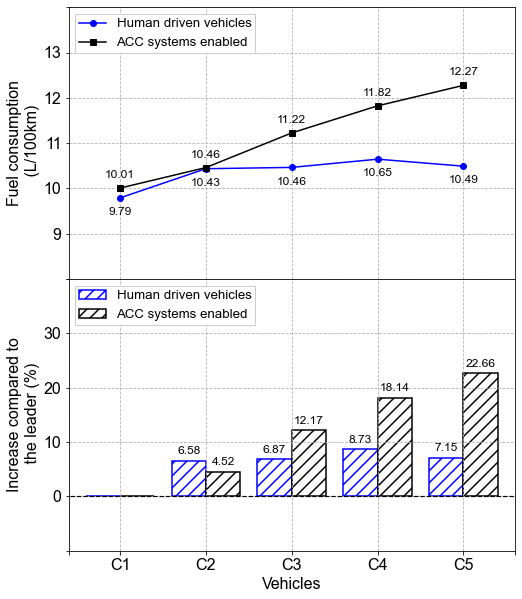

In [7]:
# Lists
HUMAN_VT = sorted(VT_per_vehicle['HUMAN'].items())
ACC_VT = sorted(VT_per_vehicle['ACC'].items())
x, y1 = zip(*HUMAN_VT)
x, y2 = zip(*ACC_VT)

# Plot VT's fuel consumption values
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(8, 10, forward=True) # (6, 8)
fig.subplots_adjust(hspace=0)

ax1.plot(x, y1, 'o-', label='Human driven vehicles', color='b')
ax1.plot(x, y2, 's-', label='ACC systems enabled', color='k')
ax1.set_yticks([8, 9, 10, 11, 12, 13, 14])
ax1.set_yticklabels(['', '9', '10', '11', '12', '13', ''])
ax1.set_ylim([8, 14])
ax1.set_ylabel('Fuel consumption\n (L/100km)')
ax1.set_xlim([-0.6, 4.6])

ax1.annotate(str(round(VT_per_vehicle['HUMAN']['C1'], 2)), ('C1',VT_per_vehicle['HUMAN']['C1']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['HUMAN']['C2'], 2)), ('C2',VT_per_vehicle['HUMAN']['C2']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['HUMAN']['C3'], 2)), ('C3',VT_per_vehicle['HUMAN']['C3']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['HUMAN']['C4'], 2)), ('C4',VT_per_vehicle['HUMAN']['C4']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['HUMAN']['C5'], 2)), ('C5',VT_per_vehicle['HUMAN']['C5']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['ACC']['C1'], 2)), ('C1',VT_per_vehicle['ACC']['C1']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['ACC']['C2'], 2)), ('C2',VT_per_vehicle['ACC']['C2']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['ACC']['C3'], 2)), ('C3',VT_per_vehicle['ACC']['C3']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['ACC']['C4'], 2)), ('C4',VT_per_vehicle['ACC']['C4']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VT_per_vehicle['ACC']['C5'], 2)), ('C5',VT_per_vehicle['ACC']['C5']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax1.grid()
ax1.legend()

# Plot increases compared to the leader
VT_Perc = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
           'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    VT_Perc['HUMAN']['C{}'.format(i)] = \
    ((VT_per_vehicle['HUMAN']['C{}'.format(i)] - VT_per_vehicle['HUMAN']['C1']) \
     / VT_per_vehicle['HUMAN']['C1'])*100
    VT_Perc['ACC']['C{}'.format(i)] = \
    ((VT_per_vehicle['ACC']['C{}'.format(i)] - VT_per_vehicle['ACC']['C1']) \
     / VT_per_vehicle['ACC']['C1'])*100

HUMAN_VT_perc = VT_Perc['HUMAN'].values()
ACC_VT_perc = VT_Perc['ACC'].values()
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.4
opacity = 1
ax2.bar(index, HUMAN_VT_perc, bar_width, alpha=opacity, hatch='//', color='none', edgecolor='b', 
        label='Human driven vehicles', linewidth=1.5)
ax2.bar(index + bar_width, ACC_VT_perc, bar_width, alpha=opacity,  hatch='//', color='none', edgecolor='k', 
        label='ACC systems enabled', linewidth=1.5)

ax2.set_ylim([-10, 40])
ax2.set_yticks([-10, 0, 10, 20, 30, 40])
ax2.set_yticklabels(['', '0', '10', '20', '30', ''])
ax2.set_ylabel('Increase compared to\n the leader (%)')
ax2.set_xlim([-0.15, 4.5])
ax2.set_xticks([-0.4, 0 + bar_width/2, 1 + bar_width/2, 2 + bar_width/2, 3 + bar_width/2, 4 + bar_width/2, 4.8])
ax2.set_xticklabels(['', 'C1', 'C2', 'C3', 'C4', 'C5', ''])
ax2.set_xlabel('Vehicles')
ax2.hlines(0, -0.6, 5, color='k', linestyle='dashed', linewidth=1.2)

ax2.annotate(str(round(VT_Perc['HUMAN']['C2'], 2)), (1, VT_Perc['HUMAN']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VT_Perc['HUMAN']['C3'], 2)), (2, VT_Perc['HUMAN']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VT_Perc['HUMAN']['C4'], 2)), (3, VT_Perc['HUMAN']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VT_Perc['HUMAN']['C5'], 2)), (4, VT_Perc['HUMAN']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VT_Perc['ACC']['C2'], 2)), (1.4, VT_Perc['ACC']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VT_Perc['ACC']['C3'], 2)), (2.4, VT_Perc['ACC']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VT_Perc['ACC']['C4'], 2)), (3.4, VT_Perc['ACC']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VT_Perc['ACC']['C5'], 2)), (4.4, VT_Perc['ACC']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax2.grid()
ax2.legend()

plt.show()

## _2) VSP model_

In [8]:
def fuel_consumption_VSP(df):
    
    # Coefficients of the VSP model (Platoon normalization)
    f = 0.00248
    m = 0.0793
    a = 0.00198
    b = 0.0397
    c = 0.201
    d = 0.00248
    
    list_vehicles = ['1', '2', '3', '4', '5']
    for i in list_vehicles:
        df['VSP{}'.format(i)] = df['Speed{}'.format(i)]*(1.1*df['Acc{}'.format(i)] 
                                                         + 9.81*np.sin((np.pi / 180)*df['Gradient{}'.format(i)]) 
                                                         + 0.132) + 3.02*0.0001*df['Speed{}'.format(i)]**3
        
        for j in range(df[df.columns[0]].count()):
            if df['VSP{}'.format(i)].values[j] < -10:
                df.loc[j, 'VSP{}'.format(i)] = f
            elif df['VSP{}'.format(i)].values[j] > 10:
                df.loc[j, 'VSP{}'.format(i)] = m*df.loc[j, 'VSP{}'.format(i)] + d
            else:
                df.loc[j, 'VSP{}'.format(i)] = a*df.loc[j, 'VSP{}'.format(i)]**2 + b*df.loc[j, 'VSP{}'.format(i)] + c
                
    return # in g/s 

fuel_consumption_VSP(HUMAN)
fuel_consumption_VSP(ACC)

# for L/s
density = 850 # in g/L (assume diesel vehicles)
list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    HUMAN['VSP{}'.format(i)] = HUMAN['VSP{}'.format(i)]/density
    ACC['VSP{}'.format(i)] = ACC['VSP{}'.format(i)]/density

# Calculate fuel consumption per vehicle    
VSP_per_vehicle = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}, 
                     'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
        VSP_per_vehicle['HUMAN']['C{}'.format(i)] = \
        ((HUMAN.loc[:, 'VSP{}'.format(i)].sum())*0.1) \
        / (0.00001*(HUMAN.loc[:, 'Speed{}'.format(i)].sum())*0.1)

for i in list_vehicles:
        VSP_per_vehicle['ACC']['C{}'.format(i)] = \
        ((ACC.loc[:, 'VSP{}'.format(i)].sum())*0.1) \
        / (0.00001*(ACC.loc[:, 'Speed{}'.format(i)].sum())*0.1)   

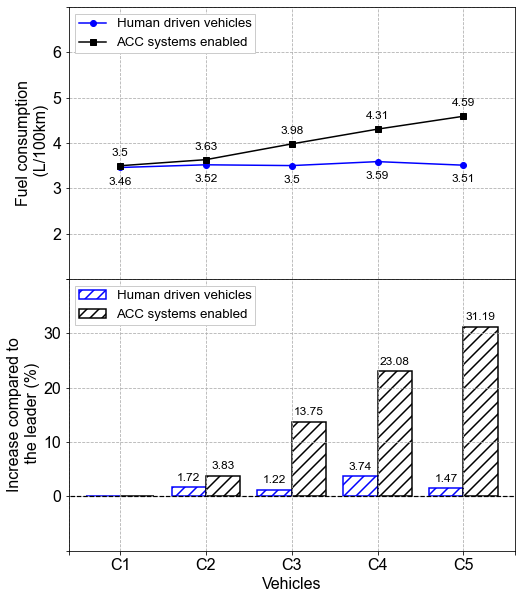

In [9]:
# Lists
HUMAN_VSP = sorted(VSP_per_vehicle['HUMAN'].items())
ACC_VSP = sorted(VSP_per_vehicle['ACC'].items())
x, y1 = zip(*HUMAN_VSP)
x, y2 = zip(*ACC_VSP)

# Plot VSP's fuel consumption values
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(8, 10, forward=True) # (6, 8)
fig.subplots_adjust(hspace=0)

ax1.plot(x, y1, 'o-', label='Human driven vehicles', color='b')
ax1.plot(x, y2, 's-', label='ACC systems enabled', color='k')
ax1.set_ylabel('Fuel consumption\n (L/100km)')
ax1.set_yticks([1, 2, 3, 4, 5, 6, 7])
ax1.set_yticklabels(['', '2', '3', '4', '5', '6', ''])
ax1.set_ylim([1, 7])
ax1.set_xlim([-0.6, 4.6])

ax1.annotate(str(round(VSP_per_vehicle['HUMAN']['C1'], 2)), ('C1',VSP_per_vehicle['HUMAN']['C1']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['HUMAN']['C2'], 2)), ('C2',VSP_per_vehicle['HUMAN']['C2']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['HUMAN']['C3'], 2)), ('C3',VSP_per_vehicle['HUMAN']['C3']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['HUMAN']['C4'], 2)), ('C4',VSP_per_vehicle['HUMAN']['C4']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['HUMAN']['C5'], 2)), ('C5',VSP_per_vehicle['HUMAN']['C5']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['ACC']['C1'], 2)), ('C1',VSP_per_vehicle['ACC']['C1']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['ACC']['C2'], 2)), ('C2',VSP_per_vehicle['ACC']['C2']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['ACC']['C3'], 2)), ('C3',VSP_per_vehicle['ACC']['C3']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['ACC']['C4'], 2)), ('C4',VSP_per_vehicle['ACC']['C4']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(VSP_per_vehicle['ACC']['C5'], 2)), ('C5',VSP_per_vehicle['ACC']['C5']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax1.grid()
ax1.legend()

# Plot increases compared to the leader
VSP_Perc = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
            'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    VSP_Perc['HUMAN']['C{}'.format(i)] = \
    ((VSP_per_vehicle['HUMAN']['C{}'.format(i)] - VSP_per_vehicle['HUMAN']['C1']) \
     / VSP_per_vehicle['HUMAN']['C1'])*100
    VSP_Perc['ACC']['C{}'.format(i)] = \
    ((VSP_per_vehicle['ACC']['C{}'.format(i)] - VSP_per_vehicle['ACC']['C1']) \
     / VSP_per_vehicle['ACC']['C1'])*100
    
HUMAN_VSP_perc = VSP_Perc['HUMAN'].values()
ACC_VSP_perc = VSP_Perc['ACC'].values()

n_groups = 5
index = np.arange(n_groups)
bar_width = 0.4
opacity = 1
ax2.bar(index, HUMAN_VSP_perc, bar_width, alpha=opacity, hatch='//', color='none', edgecolor='b', 
        label='Human driven vehicles', linewidth=1.5)
ax2.bar(index + bar_width, ACC_VSP_perc, bar_width, alpha=opacity,  hatch='//', color='none', edgecolor='k', 
        label='ACC systems enabled', linewidth=1.5)

ax2.set_ylabel('Increase compared to\n the leader (%)')
ax2.set_ylim([-10, 40])
ax2.set_yticks([-10, 0, 10, 20, 30, 40])
ax2.set_yticklabels(['', '0', '10', '20', '30', ''])
ax2.set_xlim([-0.15, 4.5])
ax2.set_xticks([-0.4, 0 + bar_width/2, 1 + bar_width/2, 2 + bar_width/2, 3 + bar_width/2, 4 + bar_width/2, 4.8])
ax2.set_xticklabels(['', 'C1', 'C2', 'C3', 'C4', 'C5', ''])
ax2.set_xlabel('Vehicles')
ax2.hlines(0, -0.6, 5, color='k', linestyle='dashed', linewidth=1.2)

ax2.annotate(str(round(VSP_Perc['HUMAN']['C2'], 2)), (1, VSP_Perc['HUMAN']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VSP_Perc['HUMAN']['C3'], 2)), (2, VSP_Perc['HUMAN']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VSP_Perc['HUMAN']['C4'], 2)), (3, VSP_Perc['HUMAN']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VSP_Perc['HUMAN']['C5'], 2)), (4, VSP_Perc['HUMAN']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VSP_Perc['ACC']['C2'], 2)), (1.4, VSP_Perc['ACC']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VSP_Perc['ACC']['C3'], 2)), (2.4, VSP_Perc['ACC']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VSP_Perc['ACC']['C4'], 2)), (3.4, VSP_Perc['ACC']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(VSP_Perc['ACC']['C5'], 2)), (4.4, VSP_Perc['ACC']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax2.grid()
ax2.legend()

plt.show()

## _3) ARRB model_

In [10]:
def fuel_consumption_ARRB(df):
    
    # Coefficients of the ARRB model (Platoon normalization)
    b1 = 0.666
    b2 = 0.019368
    b3 = 0.0012312
    b4 = 0.000048384
    g1 = 0.12096
    g2 = 0.05709312
    
    list_vehicles = ['1', '2', '3', '4', '5']
    for i in list_vehicles:
        df['ARRB{}'.format(i)] = (b1 
                                  + b2*df['Speed{}'.format(i)] 
                                  + b3*df['Speed{}'.format(i)]**2 
                                  + b4*df['Speed{}'.format(i)]**3 
                                  + g1*df['Speed{}'.format(i)]*df['Acc{}'.format(i)])
        
        for j in range(df[df.columns[0]].count()):
            if df['Acc{}'.format(i)].values[j] > 0:
                df.loc[j, 'ARRB{}'.format(i)] = \
                df.loc[j, 'ARRB{}'.format(i)] + g2*df.loc[j, 'Speed{}'.format(i)]*df.loc[j, 'Acc{}'.format(i)]**2
        
        df['ARRB{}'.format(i)] = df['ARRB{}'.format(i)]*0.001
        
    return # in L/s       

fuel_consumption_ARRB(HUMAN)
fuel_consumption_ARRB(ACC)

# Calculate fuel consumption per vehicle
ARRB_per_vehicle = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
                    'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
        ARRB_per_vehicle['HUMAN']['C{}'.format(i)] = \
        ((HUMAN.loc[:, 'ARRB{}'.format(i)].sum())*0.1) \
        / (0.00001*(HUMAN.loc[:, 'Speed{}'.format(i)].sum())*0.1)

for i in list_vehicles:
        ARRB_per_vehicle['ACC']['C{}'.format(i)] = \
        ((ACC.loc[:, 'ARRB{}'.format(i)].sum())*0.1) \
        / (0.00001*(ACC.loc[:, 'Speed{}'.format(i)].sum())*0.1)   

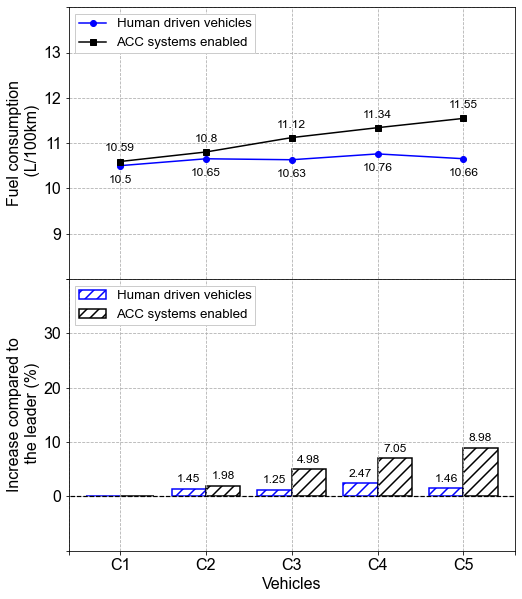

In [11]:
# Lists
HUMAN_ARRB = sorted(ARRB_per_vehicle['HUMAN'].items())
ACC_ARRB = sorted(ARRB_per_vehicle['ACC'].items())
x, y1 = zip(*HUMAN_ARRB)
x, y2 = zip(*ACC_ARRB)

# Plot ARRB's fuel consumption values
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(8, 10, forward=True) # (6, 8)
fig.subplots_adjust(hspace=0)

ax1.plot(x, y1, 'o-', label='Human driven vehicles', color='b')
ax1.plot(x, y2, 's-', label='ACC systems enabled', color='k')
ax1.set_ylim([8, 14])
ax1.set_yticks([8, 9, 10, 11, 12, 13, 14])
ax1.set_yticklabels(['', '9', '10', '11', '12', '13', ''])
ax1.set_ylabel('Fuel consumption\n (L/100km)')
ax1.set_xlim([-0.6, 4.6])

ax1.annotate(str(round(ARRB_per_vehicle['HUMAN']['C1'], 2)), ('C1',ARRB_per_vehicle['HUMAN']['C1']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['HUMAN']['C2'], 2)), ('C2',ARRB_per_vehicle['HUMAN']['C2']-0.4),
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['HUMAN']['C3'], 2)), ('C3',ARRB_per_vehicle['HUMAN']['C3']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['HUMAN']['C4'], 2)), ('C4',ARRB_per_vehicle['HUMAN']['C4']-0.4),
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['HUMAN']['C5'], 2)), ('C5',ARRB_per_vehicle['HUMAN']['C5']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['ACC']['C1'], 2)), ('C1',ARRB_per_vehicle['ACC']['C1']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['ACC']['C2'], 2)), ('C2',ARRB_per_vehicle['ACC']['C2']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['ACC']['C3'], 2)), ('C3',ARRB_per_vehicle['ACC']['C3']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['ACC']['C4'], 2)), ('C4',ARRB_per_vehicle['ACC']['C4']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax1.annotate(str(round(ARRB_per_vehicle['ACC']['C5'], 2)), ('C5',ARRB_per_vehicle['ACC']['C5']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax1.grid()
ax1.legend()

# Plot increases compared to the leader
ARRB_perc = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
           'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    ARRB_perc['HUMAN']['C{}'.format(i)] = \
    ((ARRB_per_vehicle['HUMAN']['C{}'.format(i)] - ARRB_per_vehicle['HUMAN']['C1']) \
     / ARRB_per_vehicle['HUMAN']['C1'])*100
    ARRB_perc['ACC']['C{}'.format(i)] = \
    ((ARRB_per_vehicle['ACC']['C{}'.format(i)] - ARRB_per_vehicle['ACC']['C1']) \
     / ARRB_per_vehicle['ACC']['C1'])*100
    
HUMAN_ARRB_perc = ARRB_perc['HUMAN'].values()
ACC_ARRB_perc = ARRB_perc['ACC'].values()
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.4
opacity = 1
ax2.bar(index, HUMAN_ARRB_perc, bar_width, alpha=opacity, hatch='//', color='none', edgecolor='b', 
        label='Human driven vehicles', linewidth=1.5)
ax2.bar(index + bar_width, ACC_ARRB_perc, bar_width, alpha=opacity,  hatch='//', color='none', edgecolor='k', 
        label='ACC systems enabled', linewidth=1.5)

ax2.set_ylabel('Increase compared to\n the leader (%)')
ax2.set_ylim([-10, 40])
ax2.set_yticks([-10, 0, 10, 20, 30, 40])
ax2.set_yticklabels(['', '0', '10', '20', '30', ''])
ax2.set_xlim([-0.15, 4.5])
ax2.set_xticks([-0.4, 0 + bar_width/2, 1 + bar_width/2, 2 + bar_width/2, 3 + bar_width/2, 4 + bar_width/2, 4.8])
ax2.set_xticklabels(['', 'C1', 'C2', 'C3', 'C4', 'C5', ''])
ax2.set_xlabel('Vehicles')
ax2.hlines(0, -0.6, 5, color='k', linestyle='dashed', linewidth=1.2)

ax2.annotate(str(round(ARRB_perc['HUMAN']['C2'], 2)), (1, ARRB_perc['HUMAN']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(ARRB_perc['HUMAN']['C3'], 2)), (2, ARRB_perc['HUMAN']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(ARRB_perc['HUMAN']['C4'], 2)), (3, ARRB_perc['HUMAN']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(ARRB_perc['HUMAN']['C5'], 2)), (4, ARRB_perc['HUMAN']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(ARRB_perc['ACC']['C2'], 2)), (1.4, ARRB_perc['ACC']['C2']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(ARRB_perc['ACC']['C3'], 2)), (2.4, ARRB_perc['ACC']['C3']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(ARRB_perc['ACC']['C4'], 2)), (3.4, ARRB_perc['ACC']['C4']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)
ax2.annotate(str(round(ARRB_perc['ACC']['C5'], 2)), (4.4, ARRB_perc['ACC']['C5']+1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12)

ax2.grid()
ax2.legend()

plt.show()

# _Speed and Acceleration Profiles_
<hr style="border:1.5px solid black">

In [12]:
plt.rcParams.update({'font.size': 15}) 

def plot_speed_acc(df):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
    fig.subplots_adjust(hspace=0)
    fig.set_size_inches(8, 10, forward=True) # (6, 8)
    width = 0.7
    
    ax1.plot(df['Time'], df['Speed1'], linewidth=width, color='k')
    ax6 = ax1.twinx()
    ax6.plot(df['Time'], df['Acc1'], linewidth=width, color='b')
    ax1.grid()
    ax1.axes.xaxis.set_ticklabels([])
    ax1.set_ylim([0, 40])
    ax1.set_yticks(np.arange(0, 40, 10))
    ax1.set_yticklabels(['','10','','30'])
    ax1.set_xlim(xmin=0, xmax=df.iloc[df[df.columns[0]].count()-1, 0])
    ax1.set_xticks(np.arange(0, 1300, 200))
    ax6.set_ylim([-4, 4])
    ax6.set_yticks(np.arange(-4, 4, 2))
    ax6.set_yticklabels(['','-2','','2'])
    ax1.text(100, 30, 'C1', color='k', bbox=dict(facecolor='w', edgecolor='k'))
    
    ax2.plot(df['Time'], df['Speed2'], linewidth=width, color='k')
    ax7 = ax2.twinx()
    ax7.plot(df['Time'], df['Acc2'], linewidth=width, color='b')
    ax2.grid()
    ax2.axes.xaxis.set_ticklabels([])
    ax2.set_ylim([0, 40])
    ax2.set_yticks(np.arange(0, 40, 10))
    ax2.set_yticklabels(['','10','','30'])
    ax2.set_xlim(xmin=0, xmax=df.iloc[df[df.columns[0]].count()-1, 0])
    ax2.set_xticks(np.arange(0, 1300, 200))
    ax7.set_ylim([-4, 4])
    ax7.set_yticks(np.arange(-4, 4, 2))
    ax7.set_yticklabels(['','-2','','2'])
    ax2.text(100, 30, 'C2', color='k', bbox=dict(facecolor='w', edgecolor='k'))

    ax3.plot(df['Time'], df['Speed3'], linewidth=width, color='k')
    ax8 = ax3.twinx()
    ax8.plot(df['Time'], df['Acc3'], linewidth=width, color='b')
    ax3.grid()
    ax3.axes.xaxis.set_ticklabels([])
    ax3.set_ylim([0, 40])
    ax3.set_yticks(np.arange(0, 40, 10))
    ax3.set_yticklabels(['','10','','30'])
    ax3.set_xlim(xmin=0, xmax=df.iloc[df[df.columns[0]].count()-1, 0])
    ax3.set_xticks(np.arange(0, 1300, 200))
    ax8.set_ylim([-4, 4])
    ax8.set_yticks(np.arange(-4, 4, 2))
    ax8.set_yticklabels(['','-2','','2'])
    ax3.set_ylabel('Speed per vehicle (m/s)')
    ax8.set_ylabel('Acceleration per vehicle (m/s²)', color='k')
    ax3.text(100, 30, 'C3', color='k', bbox=dict(facecolor='w', edgecolor='k'))
    
    ax4.plot(df['Time'], df['Speed4'], linewidth=width, color='k')
    ax9 = ax4.twinx()
    ax9.plot(df['Time'], df['Acc4'], linewidth=width, color='b')
    ax4.grid()
    ax4.axes.xaxis.set_ticklabels([])
    ax4.set_ylim([0, 40])
    ax4.set_yticks(np.arange(0, 40, 10))
    ax4.set_yticklabels(['','10','','30'])
    ax4.set_xlim(xmin=0, xmax=df.iloc[df[df.columns[0]].count()-1, 0])
    ax4.set_xticks(np.arange(0, 1300, 200))
    ax9.set_ylim([-4, 4])
    ax9.set_yticks(np.arange(-4, 4, 2))
    ax9.set_yticklabels(['','-2','','2'])
    ax4.text(100, 30, 'C4', color='k', bbox=dict(facecolor='w', edgecolor='k'))
    
    ax5.plot(df['Time'], df['Speed5'], linewidth=width, color='k')
    ax10 = ax5.twinx()
    ax10.plot(df['Time'], df['Acc5'], linewidth=width, color='b')
    ax5.set_ylim([0, 40])
    ax5.set_yticks(np.arange(0, 40, 10))
    ax5.set_yticklabels(['','10','','30'])
    ax5.set_xlim(xmin=0, xmax=df.iloc[df[df.columns[0]].count()-1, 0])
    ax5.set_xticks(np.arange(0, 1300, 200))
    ax10.set_ylim([-4, 4])
    ax10.set_yticks(np.arange(-4, 4, 2))
    ax10.set_yticklabels(['','-2','','2'])
    ax5.set_xlabel('Time (s)')  
    ax5.grid()
    ax5.text(100, 30, 'C5', color='k', bbox=dict(facecolor='w', edgecolor='k'))

### _Human driven vehicles_

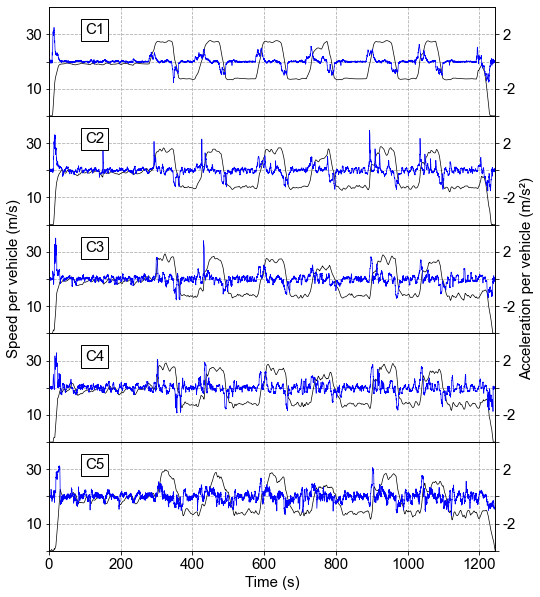

In [13]:
plot_speed_acc(HUMAN)  

### _ACC-engaged vehicles_

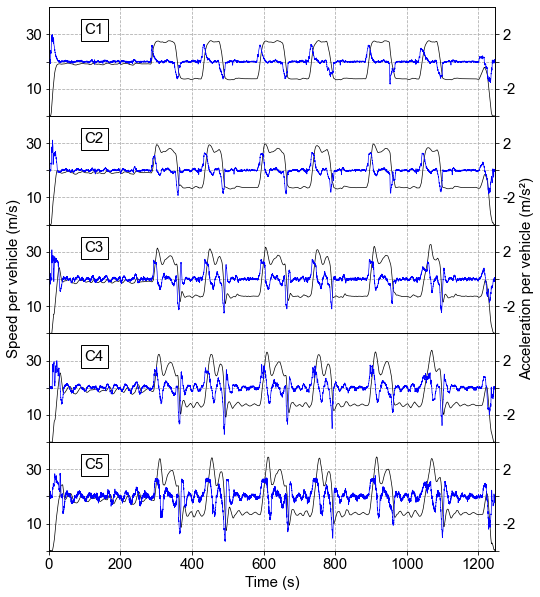

In [14]:
plot_speed_acc(ACC)  

# _Standard Deviation of Speed_
<hr style="border:1.5px solid black">

In [15]:
plt.rcParams.update({'font.size': 13})

# Plot speed trajectories to find boh steady and perturbation parts
def plot_func(df):
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(16, 6, forward=True)
    fig.subplots_adjust(hspace=0.1)
    width = 1
    
    list_vehicles = ['1', '2', '3', '4', '5']
    for i in list_vehicles:
        ax1.plot(df['Time'], df['Speed{}'.format(i)], label='Vehicle {}'.format(i), linewidth=width)
    ax1.set_ylabel('Speed (m/s)')
    ax1.set_ylim([0, 40])
    ax1.set_xlim(xmin=0, xmax=df.iloc[df[df.columns[0]].count()-1, 0])
    ax1.set_xticks(np.arange(0,1300, 50))
    ax1.grid()
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Time (s)')
    plt.xticks(rotation=45)

### _Human driven vehicles_

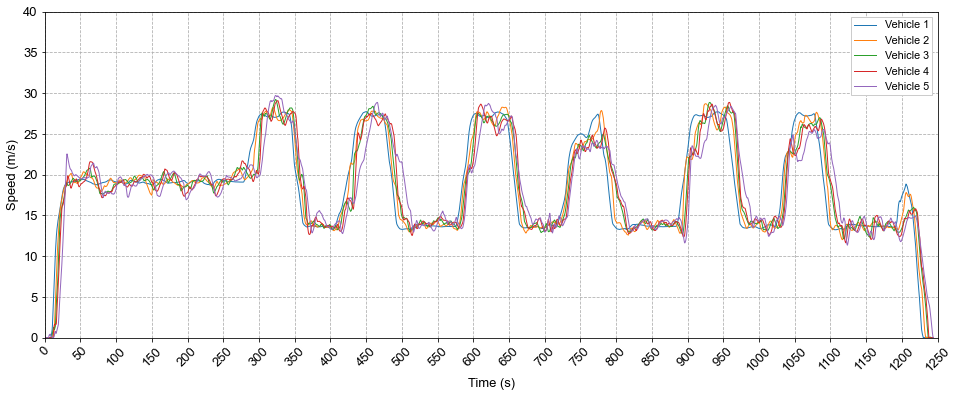

In [16]:
plot_func(HUMAN)

### _ACC-engaged vehicles_

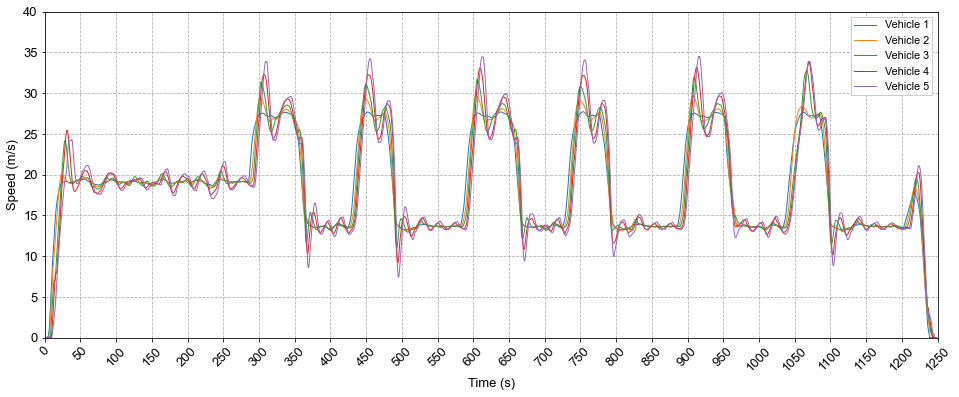

In [17]:
plot_func(ACC)

## _1) Steady parts_

In [18]:
HUMAN_1 = HUMAN.loc[HUMAN['Time']<=280.1]
HUMAN_part_1 = HUMAN_1.loc[HUMAN_1['Time']>=40]
HUMAN_2 = HUMAN.loc[HUMAN['Time']<=420.1]
HUMAN_part_2 = HUMAN_2.loc[HUMAN_2['Time']>=380]
HUMAN_3 = HUMAN.loc[HUMAN['Time']<=580.1]
HUMAN_part_3 = HUMAN_3.loc[HUMAN_3['Time']>=500]
HUMAN_4 = HUMAN.loc[HUMAN['Time']<=720.1]
HUMAN_part_4 = HUMAN_4.loc[HUMAN_4['Time']>=680]
HUMAN_5 = HUMAN.loc[HUMAN['Time']<=880.1]
HUMAN_part_5 = HUMAN_5.loc[HUMAN_5['Time']>=800]
HUMAN_6 = HUMAN.loc[HUMAN['Time']<=1030.1]
HUMAN_part_6 = HUMAN_6.loc[HUMAN_6['Time']>=970]
HUMAN_7 = HUMAN.loc[HUMAN['Time']<=1200.1]
HUMAN_part_7 = HUMAN_7.loc[HUMAN_7['Time']>=1120]
HUMAN_steady = pd.concat([HUMAN_part_1, HUMAN_part_2, HUMAN_part_3, 
                          HUMAN_part_4, HUMAN_part_5, HUMAN_part_6, HUMAN_part_7])
HUMAN_steady.reset_index(drop=True, inplace=True)

ACC_1 = ACC.loc[ACC['Time']<=280.1]
ACC_part_1 = ACC_1.loc[ACC_1['Time']>=40]
ACC_2 = ACC.loc[ACC['Time']<=420.1]
ACC_part_2 = ACC_2.loc[ACC_2['Time']>=380]
ACC_3 = ACC.loc[ACC['Time']<=580.1]
ACC_part_3 = ACC_3.loc[ACC_3['Time']>=500]
ACC_4 = ACC.loc[ACC['Time']<=720.1]
ACC_part_4 = ACC_4.loc[ACC_4['Time']>=680]
ACC_5 = ACC.loc[ACC['Time']<=880.1]
ACC_part_5 = ACC_5.loc[ACC_5['Time']>=800]
ACC_6 = ACC.loc[ACC['Time']<=1030.1]
ACC_part_6 = ACC_6.loc[ACC_6['Time']>=970]
ACC_7 = ACC.loc[ACC['Time']<=1200.1]
ACC_part_7 = ACC_7.loc[ACC_7['Time']>=1120]
ACC_steady = pd.concat([ACC_part_1, ACC_part_2, ACC_part_3, 
                        ACC_part_4, ACC_part_5, ACC_part_6, ACC_part_7])
ACC_steady.reset_index(drop=True, inplace=True)

In [19]:
# Calculate Tractive power per vehicle
tractive_power(HUMAN_steady)
tractive_power(ACC_steady)

# Calculate Τractive energy per vehicle 
Tractive_energy_per_vehicle_steady = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
                                      'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
        Tractive_energy_per_vehicle_steady['HUMAN']['C{}'.format(i)] = \
        ((HUMAN_steady.loc[:, 'Tr_power{}'.format(i)].sum())*0.1) \
        / (0.036*(HUMAN_steady.loc[:, 'Speed{}'.format(i)].sum())*0.1)

for i in list_vehicles:
        Tractive_energy_per_vehicle_steady['ACC']['C{}'.format(i)] = \
        ((ACC_steady.loc[:, 'Tr_power{}'.format(i)].sum())*0.1) \
        / (0.036*(ACC_steady.loc[:, 'Speed{}'.format(i)].sum())*0.1)   

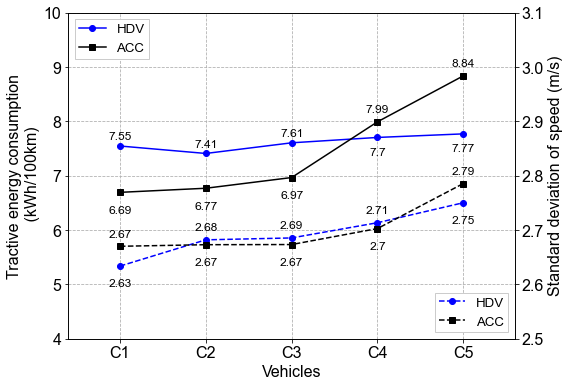

In [20]:
plt.rcParams.update({'font.size': 16})

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(8, 6, forward=True) # (6, 4)
fig.subplots_adjust(hspace=0)

# Plot Tractive energy consumption values for steady parts
HUMAN_steady_tr_energy = sorted(Tractive_energy_per_vehicle_steady['HUMAN'].items())
ACC_steady_tr_energy = sorted(Tractive_energy_per_vehicle_steady['ACC'].items())
x, y1 = zip(*HUMAN_steady_tr_energy)
x, y2 = zip(*ACC_steady_tr_energy)

ax1.plot(x, y1, 'o-', label='HDV', color='b')
ax1.plot(x, y2, 's-', label='ACC', color='k')
ax1.set_ylim([4, 10])
ax1.set_yticks([4, 5, 6, 7, 8, 9, 10])
ax1.set_ylabel('Tractive energy consumption\n (kWh/100km)')
ax1.set_xlim([-0.6,4.6])
ax1.set_xlabel('Vehicles')

ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['HUMAN']['C1'], 2)), 
             ('C1',Tractive_energy_per_vehicle_steady['HUMAN']['C1']+0.1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['HUMAN']['C2'], 2)), 
             ('C2',Tractive_energy_per_vehicle_steady['HUMAN']['C2']+0.1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['HUMAN']['C3'], 2)), 
             ('C3',Tractive_energy_per_vehicle_steady['HUMAN']['C3']+0.1), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['HUMAN']['C4'], 2)), 
             ('C4',Tractive_energy_per_vehicle_steady['HUMAN']['C4']-0.35), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['HUMAN']['C5'], 2)), 
             ('C5',Tractive_energy_per_vehicle_steady['HUMAN']['C5']-0.35), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['ACC']['C1'], 2)), 
             ('C1',Tractive_energy_per_vehicle_steady['ACC']['C1']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['ACC']['C2'], 2)), 
             ('C2',Tractive_energy_per_vehicle_steady['ACC']['C2']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['ACC']['C3'], 2)), 
             ('C3',Tractive_energy_per_vehicle_steady['ACC']['C3']-0.4), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['ACC']['C4'], 2)), 
             ('C4',Tractive_energy_per_vehicle_steady['ACC']['C4']+0.15), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_steady['ACC']['C5'], 2)), 
             ('C5',Tractive_energy_per_vehicle_steady['ACC']['C5']+0.15), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')

# Calculate and plot standard deviation of speed for steady parts
sd_steady_parts = {'HUMAN': {'C1':statistics.stdev(HUMAN_steady['Speed1']), 
                             'C2':statistics.stdev(HUMAN_steady['Speed2']), 
                             'C3':statistics.stdev(HUMAN_steady['Speed3']), 
                             'C4':statistics.stdev(HUMAN_steady['Speed4']), 
                             'C5':statistics.stdev(HUMAN_steady['Speed5'])},
                   'ACC': {'C1':statistics.stdev(ACC_steady['Speed1']), 
                           'C2':statistics.stdev(ACC_steady['Speed2']), 
                           'C3':statistics.stdev(ACC_steady['Speed3']), 
                           'C4':statistics.stdev(ACC_steady['Speed4']), 
                           'C5':statistics.stdev(ACC_steady['Speed5'])}}

ax2=ax1.twinx()
HUMAN_steady_sd = sorted(sd_steady_parts['HUMAN'].items())
ACC_steady_sd = sorted(sd_steady_parts['ACC'].items())
x, y3 = zip(*HUMAN_steady_sd)
x, y4 = zip(*ACC_steady_sd)

ax2.plot(x, y3, 'o--', label='HDV', color='b')
ax2.plot(x, y4, 's--', label='ACC', color='k')
ax2.set_ylim([2.5, 3.1])
ax2.set_yticks([2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1,])
ax2.set_ylabel('Standard deviation of speed (m/s)')
ax2.set_xlim([-0.6,4.6])

ax2.annotate(str(round(sd_steady_parts['HUMAN']['C1'], 2)), ('C1',sd_steady_parts['HUMAN']['C1']-0.04), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['HUMAN']['C2'], 2)), ('C2',sd_steady_parts['HUMAN']['C2']+0.015), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['HUMAN']['C3'], 2)), ('C3',sd_steady_parts['HUMAN']['C3']+0.015), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['HUMAN']['C4'], 2)), ('C4',sd_steady_parts['HUMAN']['C4']+0.015), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['HUMAN']['C5'], 2)), ('C5',sd_steady_parts['HUMAN']['C5']-0.04), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['ACC']['C1'], 2)), ('C1',sd_steady_parts['ACC']['C1']+0.015), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['ACC']['C2'], 2)), ('C2',sd_steady_parts['ACC']['C2']-0.04), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['ACC']['C3'], 2)), ('C3',sd_steady_parts['ACC']['C3']-0.04), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['ACC']['C4'], 2)), ('C4',sd_steady_parts['ACC']['C4']-0.04), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_steady_parts['ACC']['C5'], 2)), ('C5',sd_steady_parts['ACC']['C5']+0.015), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')

ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.show()

## _2) Perturbation parts_

In [21]:
HUMAN_1 = HUMAN.loc[HUMAN['Time']<=40.1]
HUMAN_part_1 = HUMAN_1.loc[HUMAN_1['Time']>=0]
HUMAN_2 = HUMAN.loc[HUMAN['Time']<=380.1]
HUMAN_part_2 = HUMAN_2.loc[HUMAN_2['Time']>=280]
HUMAN_3 = HUMAN.loc[HUMAN['Time']<=500.1]
HUMAN_part_3 = HUMAN_3.loc[HUMAN_3['Time']>=420]
HUMAN_4 = HUMAN.loc[HUMAN['Time']<=680.1]
HUMAN_part_4 = HUMAN_4.loc[HUMAN_4['Time']>=580]
HUMAN_5 = HUMAN.loc[HUMAN['Time']<=800.1]
HUMAN_part_5 = HUMAN_5.loc[HUMAN_5['Time']>=720]
HUMAN_6 = HUMAN.loc[HUMAN['Time']<=970.1]
HUMAN_part_6 = HUMAN_6.loc[HUMAN_6['Time']>=880]
HUMAN_7 = HUMAN.loc[HUMAN['Time']<=1120.1]
HUMAN_part_7 = HUMAN_7.loc[HUMAN_7['Time']>=1030]
HUMAN_8 = HUMAN.loc[HUMAN['Time']<=1240.1]
HUMAN_part_8 = HUMAN_8.loc[HUMAN_8['Time']>=1200]
HUMAN_pert = pd.concat([HUMAN_part_1, HUMAN_part_2, HUMAN_part_3, HUMAN_part_4, 
                        HUMAN_part_5, HUMAN_part_6, HUMAN_part_7, HUMAN_part_8])
HUMAN_pert.reset_index(drop=True, inplace=True)

ACC_1 = ACC.loc[ACC['Time']<=40.1]
ACC_part_1 = ACC_1.loc[ACC_1['Time']>=0]
ACC_2 = ACC.loc[ACC['Time']<=380.1]
ACC_part_2 = ACC_2.loc[ACC_2['Time']>=280]
ACC_3 = ACC.loc[ACC['Time']<=500.1]
ACC_part_3 = ACC_3.loc[ACC_3['Time']>=420]
ACC_4 = ACC.loc[ACC['Time']<=680.1]
ACC_part_4 = ACC_4.loc[ACC_4['Time']>=580]
ACC_5 = ACC.loc[ACC['Time']<=800.1]
ACC_part_5 = ACC_5.loc[ACC_5['Time']>=720]
ACC_6 = ACC.loc[ACC['Time']<=970.1]
ACC_part_6 = ACC_6.loc[ACC_6['Time']>=880]
ACC_7 = ACC.loc[ACC['Time']<=1120.1]
ACC_part_7 = ACC_7.loc[ACC_7['Time']>=1030]
ACC_8 = ACC.loc[ACC['Time']<=1240.1]
ACC_part_8 = ACC_8.loc[ACC_8['Time']>=1200]
ACC_pert = pd.concat([ACC_part_1, ACC_part_2, ACC_part_3, ACC_part_4, 
                      ACC_part_5, ACC_part_6, ACC_part_7, ACC_part_8])
ACC_pert.reset_index(drop=True, inplace=True)

In [22]:
# Calculate Tractive power per vehicle
tractive_power(HUMAN_pert)
tractive_power(ACC_pert)

# Τractive energy per vehicle 
Tractive_energy_per_vehicle_pert = {'HUMAN': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0},
                                    'ACC': {'C1':0, 'C2':0, 'C3':0, 'C4':0, 'C5':0}}

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
        Tractive_energy_per_vehicle_pert['HUMAN']['C{}'.format(i)] = \
        ((HUMAN_pert.loc[:, 'Tr_power{}'.format(i)].sum())*0.1) \
        / (0.036*(HUMAN_pert.loc[:, 'Speed{}'.format(i)].sum())*0.1)

for i in list_vehicles:
        Tractive_energy_per_vehicle_pert['ACC']['C{}'.format(i)] = \
        ((ACC_pert.loc[:, 'Tr_power{}'.format(i)].sum())*0.1) \
        / (0.036*(ACC_pert.loc[:, 'Speed{}'.format(i)].sum())*0.1)   

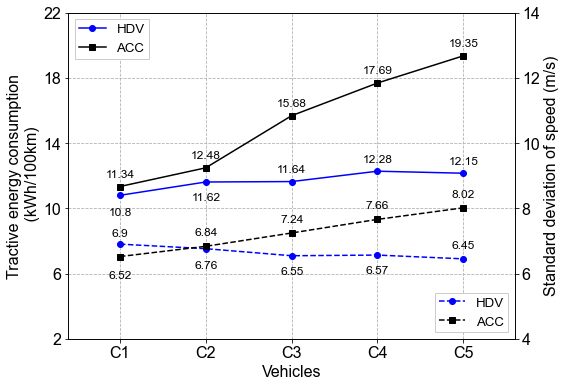

In [23]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(8, 6, forward=True) # (6,4)
fig.subplots_adjust(hspace=0)

# Plot Tractive energy consumption values for perturbation parts
HUMAN_pert_tr_energy = sorted(Tractive_energy_per_vehicle_pert['HUMAN'].items())
ACC_pert_tr_energy = sorted(Tractive_energy_per_vehicle_pert['ACC'].items())
x, y1 = zip(*HUMAN_pert_tr_energy)
x, y2 = zip(*ACC_pert_tr_energy)

ax1.plot(x, y1, 'o-', label='HDV', color='b')
ax1.plot(x, y2, 's-', label='ACC', color='k')
ax1.set_ylim([2, 22])
ax1.set_yticks([2, 6, 10, 14, 18, 22])
ax1.set_ylabel('Tractive energy consumption\n (kWh/100km)')
ax1.set_xlim([-0.6,4.6])
ax1.set_xlabel('Vehicles')

ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['HUMAN']['C1'], 2)), 
             ('C1',Tractive_energy_per_vehicle_pert['HUMAN']['C1']-1.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['HUMAN']['C2'], 2)), 
             ('C2',Tractive_energy_per_vehicle_pert['HUMAN']['C2']-1.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['HUMAN']['C3'], 2)), 
             ('C3',Tractive_energy_per_vehicle_pert['HUMAN']['C3']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['HUMAN']['C4'], 2)), 
             ('C4',Tractive_energy_per_vehicle_pert['HUMAN']['C4']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['HUMAN']['C5'], 2)), 
             ('C5',Tractive_energy_per_vehicle_pert['HUMAN']['C5']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['ACC']['C1'], 2)), 
             ('C1',Tractive_energy_per_vehicle_pert['ACC']['C1']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['ACC']['C2'], 2)), 
             ('C2',Tractive_energy_per_vehicle_pert['ACC']['C2']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['ACC']['C3'], 2)), 
             ('C3',Tractive_energy_per_vehicle_pert['ACC']['C3']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['ACC']['C4'], 2)), 
             ('C4',Tractive_energy_per_vehicle_pert['ACC']['C4']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax1.annotate(str(round(Tractive_energy_per_vehicle_pert['ACC']['C5'], 2)), 
             ('C5',Tractive_energy_per_vehicle_pert['ACC']['C5']+0.5), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')

# Calculate and plot standard deviation of speed for perturbation parts
sd_perturbation_parts = {'HUMAN': {'C1':statistics.stdev(HUMAN_pert['Speed1']), 
                                   'C2':statistics.stdev(HUMAN_pert['Speed2']), 
                                   'C3':statistics.stdev(HUMAN_pert['Speed3']), 
                                   'C4':statistics.stdev(HUMAN_pert['Speed4']), 
                                   'C5':statistics.stdev(HUMAN_pert['Speed5'])},
                         'ACC': {'C1':statistics.stdev(ACC_pert['Speed1']), 
                                 'C2':statistics.stdev(ACC_pert['Speed2']), 
                                 'C3':statistics.stdev(ACC_pert['Speed3']), 
                                 'C4':statistics.stdev(ACC_pert['Speed4']), 
                                 'C5':statistics.stdev(ACC_pert['Speed5'])}}

ax2=ax1.twinx()
HUMAN_pert_sd = sorted(sd_perturbation_parts['HUMAN'].items())
ACC_pert_sd = sorted(sd_perturbation_parts['ACC'].items())
x, y3 = zip(*HUMAN_pert_sd)
x, y4 = zip(*ACC_pert_sd)

ax2.plot(x, y3, 'o--', label='HDV', color='b')
ax2.plot(x, y4, 's--', label='ACC', color='k')
ax2.set_ylim([4, 14])
ax2.set_ylabel('Standard deviation of speed (m/s)')
ax2.set_xlim([-0.6,4.6])

ax2.annotate(str(round(sd_perturbation_parts['HUMAN']['C1'], 2)), 
             ('C1',sd_perturbation_parts['HUMAN']['C1']+0.2), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['HUMAN']['C2'], 2)), 
             ('C2',sd_perturbation_parts['HUMAN']['C2']-0.65), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['HUMAN']['C3'], 2)), 
             ('C3',sd_perturbation_parts['HUMAN']['C3']-0.6), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['HUMAN']['C4'], 2)), 
             ('C4',sd_perturbation_parts['HUMAN']['C4']-0.6), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['HUMAN']['C5'], 2)), 
             ('C5',sd_perturbation_parts['HUMAN']['C5']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['ACC']['C1'], 2)), 
             ('C1',sd_perturbation_parts['ACC']['C1']-0.7),
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['ACC']['C2'], 2)), 
             ('C2',sd_perturbation_parts['ACC']['C2']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['ACC']['C3'], 2)), 
             ('C3',sd_perturbation_parts['ACC']['C3']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['ACC']['C4'], 2)), 
             ('C4',sd_perturbation_parts['ACC']['C4']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')
ax2.annotate(str(round(sd_perturbation_parts['ACC']['C5'], 2)), 
             ('C5',sd_perturbation_parts['ACC']['C5']+0.3), 
             textcoords="offset points", xytext=(0,1), ha='center', fontsize=12, color='k')

ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.show()

# _Speed Overshoots_
<hr style="border:1.5px solid black">

### _Human driven vehicles_

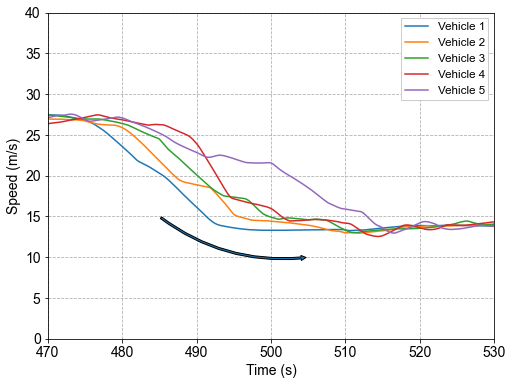

In [24]:
plt.rcParams.update({'font.size': 14}) 

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6, forward=True) #(6,4) 
    
list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    ax.plot(HUMAN['Time'], HUMAN['Speed{}'.format(i)], label='Vehicle {}'.format(i))

ax.set_ylim([0, 40])
ax.set_ylabel('Speed (m/s)')
ax.set_xlim(470, 530)
ax.set_xticks(np.arange(470, 531, 10))
ax.set_xlabel('Time (s)')
ax.legend(loc='upper right')
ax.grid()

ax.annotate("", 
            xy=(505, 10), xycoords='data',
            xytext=(485, 15), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3, rad=0.2"))
plt.show()

### _ACC-engaged vehicles_

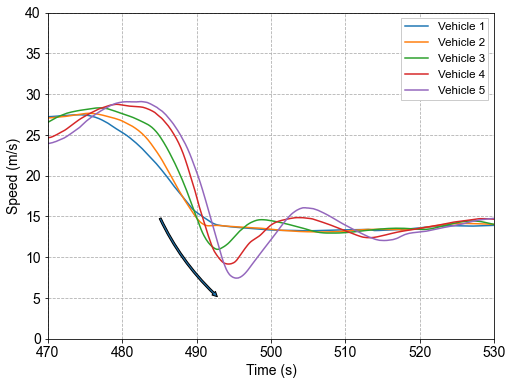

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6, forward=True) # (6, 4)

list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    ax.plot(ACC['Time'], ACC['Speed{}'.format(i)], label='Vehicle {}'.format(i))
    
ax.set_ylim([0, 40])
ax.set_ylabel('Speed (m/s)')
ax.set_xlim(470, 530)
ax.set_xticks(np.arange(470, 531, 10))
ax.set_xlabel('Time (s)')
ax.legend(loc = 'upper right')
ax.grid()

ax.annotate("", 
            xy=(493, 5), xycoords='data',
            xytext=(485, 15), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3, rad=0.1"))

plt.show()

# _Time-gaps_
<hr style="border:1.5px solid black">

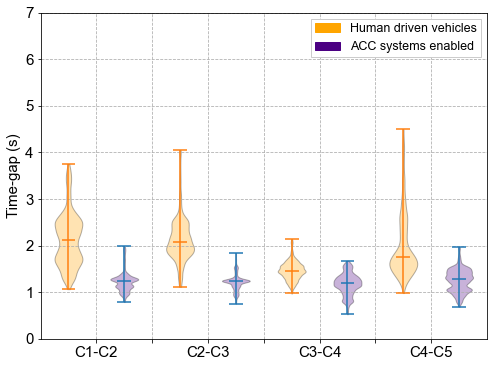

In [26]:
plt.rcParams.update({'font.size': 15})

fig, ax= plt.subplots(1, 1, figsize=(8, 6)) # (6, 4)

# Time and space-gaps for specific parts 
HUMAN_new = HUMAN.loc[HUMAN['Time']<=1000.1]
HUMAN_new = HUMAN_new.loc[HUMAN_new['Time']>=200]
ACC_new = ACC.loc[ACC['Time']<=1000.1]
ACC_new = ACC_new.loc[ACC_new['Time']>=200]

violin_parts = plt.violinplot(positions=[2, 4, 6, 8], 
                              dataset=[ACC_new['Time_gap12'], ACC_new['Time_gap23'], 
                                       ACC_new['Time_gap34'], ACC_new['Time_gap45']], 
                              showmedians=True)

for pc in violin_parts['bodies']:
    pc.set_facecolor('indigo')
    pc.set_edgecolor('black')
color2 = 'indigo'

violin_parts = plt.violinplot(positions=[1, 3, 5, 7], 
                              dataset=[HUMAN_new['Time_gap12'], HUMAN_new['Time_gap23'], 
                                       HUMAN_new['Time_gap34'], HUMAN_new['Time_gap45']], 
                              showmedians=True)

for pc in violin_parts['bodies']:
    pc.set_facecolor('orange')
    pc.set_edgecolor('black')
color1 = 'orange'

ax.set_ylim([0, 7])
ax.set_ylabel('Time-gap (s)')
ax.set_xlim([0.5,8.5])
ax.set_xticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
ax.set_xticklabels(['C1-C2', '', 'C2-C3', '',  'C3-C4', '', 'C4-C5'])

labels = []
labels.append((mpatches.Patch(color=color1), 'Human driven vehicles'))
labels.append((mpatches.Patch(color=color2), 'ACC systems enabled'))
plt.legend(*zip(*labels), loc='upper right')
ax.grid()

# _Space-gaps_
<hr style="border:1.5px solid black">

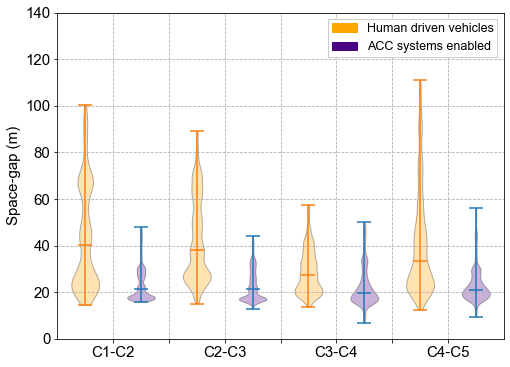

In [27]:
fig, ax= plt.subplots(1, 1, figsize=(8, 6)) # (6, 4)

violin_parts = plt.violinplot(positions=[2, 4, 6, 8], 
                              dataset=[ACC_new['IVS1'], ACC_new['IVS2'], ACC_new['IVS3'], ACC_new['IVS4']], 
                              showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('indigo')
    pc.set_edgecolor('black')
color2 = 'indigo'

violin_parts = plt.violinplot(positions=[1, 3, 5, 7], 
                              dataset=[HUMAN_new['IVS1'], HUMAN_new['IVS2'], HUMAN_new['IVS3'], HUMAN_new['IVS4']], 
                              showmedians=True)

for pc in violin_parts['bodies']:
    pc.set_facecolor('orange')
    pc.set_edgecolor('black')
color1 = 'orange'

ax.set_ylim([0, 140])
ax.set_ylabel('Space-gap (m)')
ax.set_xlim([0.5,8.5])
ax.set_xticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
ax.set_xticklabels(['C1-C2', '', 'C2-C3', '',  'C3-C4', '', 'C4-C5'])

labels = []
labels.append((mpatches.Patch(color=color1), 'Human driven vehicles'))
labels.append((mpatches.Patch(color=color2), 'ACC systems enabled'))
plt.legend(*zip(*labels), loc='upper right')
ax.grid()

# _Time-gap Scatter Plots_
<hr style="border:1.5px solid black">

### _Human driven vehicles_

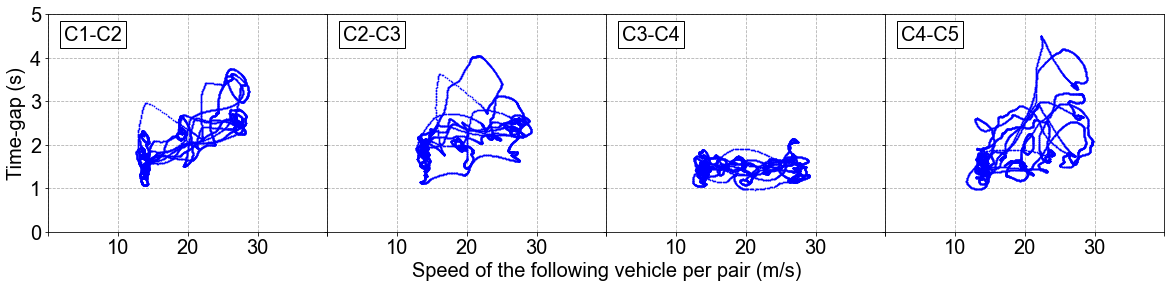

In [28]:
plt.rcParams.update({'font.size': 20}) 

fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(1, 4)
fig.set_size_inches(20, 4, forward=True) # (16, 4)
fig.subplots_adjust(wspace=0)

ax1.scatter(HUMAN_new['Speed2'], HUMAN_new['Time_gap12'], c ="blue", s=0.5)
ax1.set_ylabel("Time-gap (s)")
ax1.set_ylim([0, 5])
ax1.set_xlabel('')
ax1.set_xticks([0, 10, 20, 30, 40])
ax1.set_xticklabels(['','10','20','30',''])
ax1.text(2.2, 4.4, 'C1-C2', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax1.grid()
ax1.set_axisbelow(True)

ax2.scatter(HUMAN_new['Speed3'], HUMAN_new['Time_gap23'], c ="blue", s=0.5)
ax2.set_xlabel("Speed of the following vehicle per pair (m/s)", x=1)
ax2.set_ylim([0, 5])
ax2.set_ylabel('')
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xticks([0, 10, 20, 30, 40])
ax2.set_xticklabels(['','10','20','30',''])
ax2.text(2.2, 4.4, 'C2-C3', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax2.grid()
ax2.set_axisbelow(True)

ax3.scatter(HUMAN_new['Speed4'], HUMAN_new['Time_gap34'], c ="blue", s=0.5)
ax3.set_ylabel('')
ax3.set_ylim([0, 5])
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.axes.yaxis.set_ticklabels([])
ax3.set_xticks([0, 10, 20, 30, 40])
ax3.set_xticklabels(['','10','20','30',''])
ax3.text(2.2, 4.4, 'C3-C4', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax3.grid()
ax3.set_axisbelow(True)

ax4.scatter(HUMAN_new['Speed5'], HUMAN_new['Time_gap45'], c ="blue", s=0.5)
ax4.set_ylabel('')
ax4.set_ylim([0, 5])
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.axes.yaxis.set_ticklabels([])
ax4.set_xticks([0, 10, 20, 30, 40])
ax4.set_xticklabels(['','10','20','30',''])
ax4.text(2.2, 4.4, 'C4-C5', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax4.grid()
ax4.set_axisbelow(True)

### _ACC-engaged vehicles_

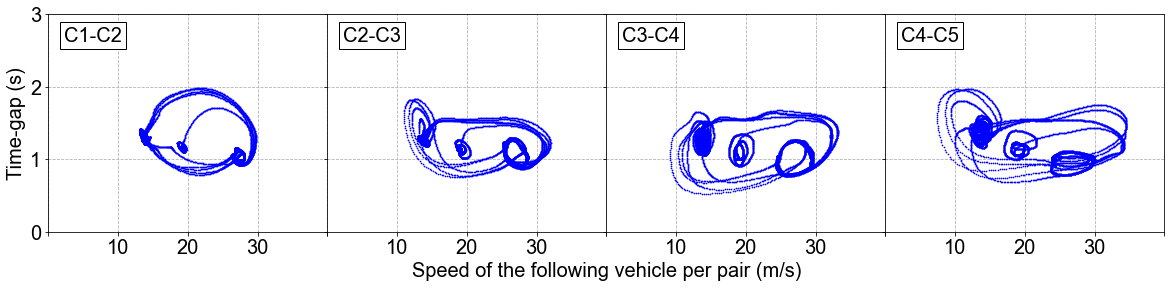

In [29]:
fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(1, 4)
fig.set_size_inches(20, 4, forward=True) # (16, 4)
fig.subplots_adjust(wspace=0)

ax1.scatter(ACC_new['Speed2'], ACC_new['Time_gap12'], marker='o', c ="blue", s=0.5)
ax1.set_ylabel("Time-gap (s)")
ax1.set_ylim([0, 3])
ax1.set_xlabel('')
ax1.set_yticks([0, 1, 2, 3])
ax1.set_xticks([0, 10, 20, 30, 40])
ax1.set_xticklabels(['','10','20','30',''])
ax1.text(2.2, 2.63, 'C1-C2', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax1.grid()
ax1.set_axisbelow(True)

ax2.scatter(ACC_new['Speed3'], ACC_new['Time_gap23'], c ="blue", s=0.5)
ax2.set_xlabel("Speed of the following vehicle per pair (m/s)", x=1)
ax2.set_ylim([0, 3])
ax2.set_ylabel('')
ax2.axes.yaxis.set_ticklabels([])
ax2.set_yticks([0, 1, 2, 3])
ax2.set_xticks([0, 10, 20, 30, 40])
ax2.set_xticklabels(['','10','20','30',''])
ax2.text(2.2, 2.63, 'C2-C3', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax2.grid()
ax2.set_axisbelow(True)

ax3.scatter(ACC_new['Speed4'], ACC_new['Time_gap34'], c ="blue", s=0.5)
ax3.set_ylabel('')
ax3.set_ylim([0, 3])
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.axes.yaxis.set_ticklabels([])
ax3.set_yticks([0, 1, 2, 3])
ax3.set_xticks([0, 10, 20, 30, 40])
ax3.set_xticklabels(['','10','20','30',''])
ax3.text(2.2, 2.63, 'C3-C4', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax3.grid()
ax3.set_axisbelow(True)

ax4.scatter(ACC_new['Speed5'], ACC_new['Time_gap45'], c ="blue", s=0.5)
ax4.set_ylabel('')
ax4.set_ylim([0, 3])
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.set_yticks([0, 1, 2, 3])
ax4.axes.yaxis.set_ticklabels([])
ax4.set_xticks([0, 10, 20, 30, 40])
ax4.set_xticklabels(['','10','20','30',''])
ax4.text(2.2, 2.63, 'C4-C5', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax4.grid()
ax4.set_axisbelow(True)

# _Space-gap Scatter Plots_
<hr style="border:1.5px solid black">

### _Human driven vehicles_

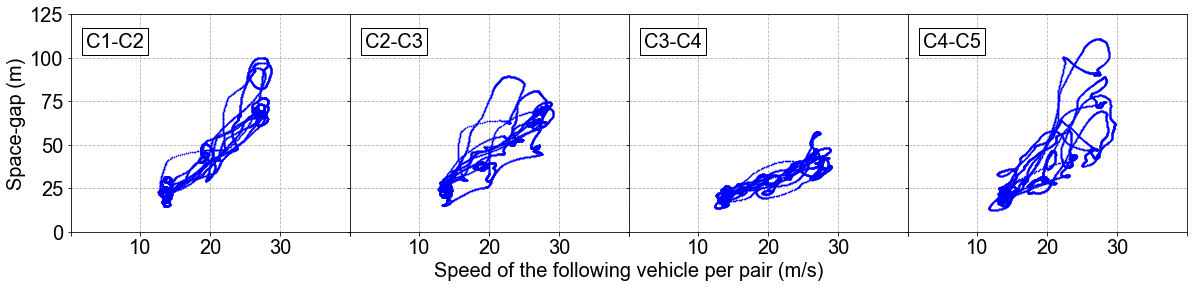

In [30]:
fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(1, 4)
fig.set_size_inches(20, 4, forward=True) # (16, 4)
fig.subplots_adjust(wspace=0)

ax1.scatter(HUMAN_new['Speed2'], HUMAN_new['IVS1'], c ="blue", s=0.5)
ax1.set_ylabel("Space-gap (m)")
ax1.set_ylim([0, 125])
ax1.set_xlabel('')
ax1.set_xticks([0, 10, 20, 30, 40])
ax1.set_xticklabels(['','10','20','30',''])
ax1.text(2.2, 106, 'C1-C2', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax1.grid()
ax1.set_axisbelow(True)

ax2.scatter(HUMAN_new['Speed3'], HUMAN_new['IVS2'], c ="blue", s=0.5)
ax2.set_xlabel("Speed of the following vehicle per pair (m/s)", x=1)
ax2.set_ylim([0, 125])
ax2.set_ylabel('')
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xticks([0, 10, 20, 30, 40])
ax2.set_xticklabels(['','10','20','30',''])
ax2.text(2.2, 106, 'C2-C3', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax2.grid()
ax2.set_axisbelow(True)

ax3.scatter(HUMAN_new['Speed4'], HUMAN_new['IVS3'], c ="blue", s=0.5)
ax3.set_ylabel('')
ax3.set_ylim([0, 125])
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.axes.yaxis.set_ticklabels([])
ax3.set_xticks([0, 10, 20, 30, 40])
ax3.set_xticklabels(['','10','20','30',''])
ax3.text(2.2, 106, 'C3-C4', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax3.grid()
ax3.set_axisbelow(True)

ax4.scatter(HUMAN_new['Speed5'], HUMAN_new['IVS4'], c ="blue", s=0.5)
ax4.set_ylabel('')
ax4.set_ylim([0, 125])
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.axes.yaxis.set_ticklabels([])
ax4.set_xticks([0, 10, 20, 30, 40])
ax4.set_xticklabels(['','10','20','30',''])
ax4.text(2.2, 106, 'C4-C5', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax4.grid()
ax4.set_axisbelow(True)

### _ACC-engaged vehicles_

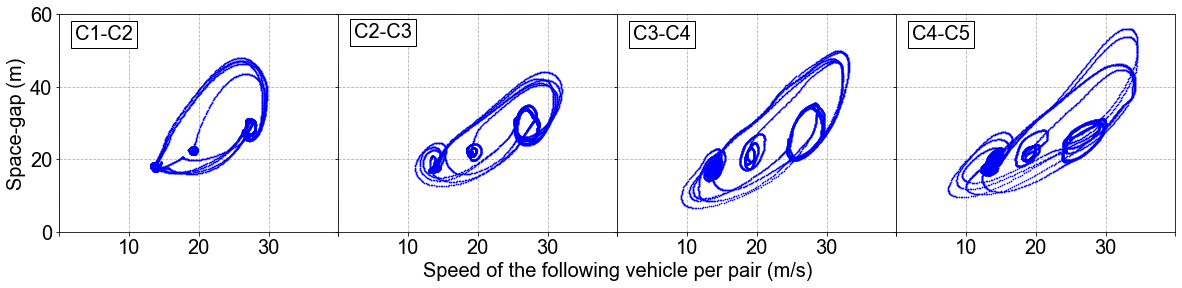

In [31]:
fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(1, 4)
fig.set_size_inches(20, 4, forward=True) # (16, 4)
fig.subplots_adjust(wspace=0)

ax1.scatter(ACC_new['Speed2'], ACC_new['IVS1'], marker='o', c ="blue", s=0.5)
ax1.set_ylabel("Space-gap (m)")
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.set_xticks([0, 10, 20, 30, 40])
ax1.set_xticklabels(['','10','20','30',''])
ax1.text(2.2, 53, 'C1-C2', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax1.grid()
ax1.set_axisbelow(True)

ax2.scatter(ACC_new['Speed3'], ACC_new['IVS2'], c ="blue", s=0.5)
ax2.set_xlabel("Speed of the following vehicle per pair (m/s)", x=1)
ax2.set_ylim([0, 60])
ax2.set_ylabel('')
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xticks([0, 10, 20, 30, 40])
ax2.set_xticklabels(['','10','20','30',''])
ax2.text(2.2, 53.5, 'C2-C3', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax2.grid()
ax2.set_axisbelow(True)

ax3.scatter(ACC_new['Speed4'], ACC_new['IVS3'], c ="blue", s=0.5)
ax3.set_ylabel('')
ax3.set_ylim([0, 60])
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.axes.yaxis.set_ticklabels([])
ax3.set_xticks([0, 10, 20, 30, 40])
ax3.set_xticklabels(['','10','20','30',''])
ax3.text(2.2, 53, 'C3-C4', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax3.grid()
ax3.set_axisbelow(True)

ax4.scatter(ACC_new['Speed5'], ACC_new['IVS4'], c ="blue", s=0.5)
ax4.set_ylabel('')
ax4.set_ylim([0, 60])
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.axes.yaxis.set_ticklabels([])
ax4.set_xticks([0, 10, 20, 30, 40])
ax4.set_xticklabels(['','10','20','30',''])
ax4.text(2.2, 53, 'C4-C5', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax4.grid()
ax4.set_axisbelow(True)

# _Speed-acceleration joint probability distributions_
<hr style="border:1.5px solid black">

### _Human driven vehicles_

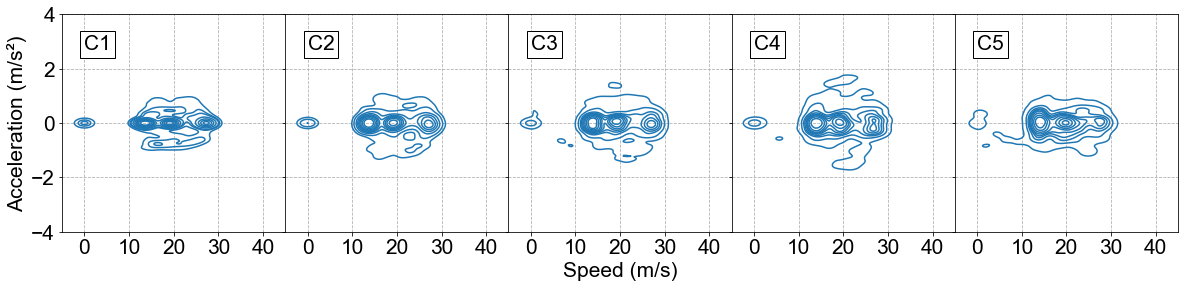

In [32]:
plt.rcParams.update({'font.size': 21}) 

fig, ((ax1), (ax2), (ax3), (ax4), (ax5)) = plt.subplots(1, 5)
fig.set_size_inches(20, 4, forward=True) 
fig.subplots_adjust(wspace=0)

sns.kdeplot(ax=ax1, x=HUMAN.Speed1, y=HUMAN.Acc1) 
sns.kdeplot(ax=ax2, x=HUMAN.Speed2, y=HUMAN.Acc2) 
sns.kdeplot(ax=ax3, x=HUMAN.Speed3, y=HUMAN.Acc3) 
sns.kdeplot(ax=ax4, x=HUMAN.Speed4, y=HUMAN.Acc4) 
sns.kdeplot(ax=ax5, x=HUMAN.Speed5, y=HUMAN.Acc5) 

ax1.set_ylim([-4, 4])
ax1.set_ylabel('Acceleration (m/s²)')
ax1.set_xlabel('')
ax1.set_xticks([0, 10, 20, 30, 40])
ax1.set_xlim([-5, 45])
ax1.text(0, 2.7, 'C1', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax1.grid()
ax1.set_axisbelow(True)

ax2.set_ylim([-4, 4])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([0, 10, 20, 30, 40])
ax2.set_xlim([-5, 45])
ax2.text(0, 2.7, 'C2', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax2.grid()
ax2.set_axisbelow(True)

ax3.set_ylim([-4, 4])
ax3.axes.yaxis.set_ticklabels([])
ax3.set_xlabel('Speed (m/s)')
ax3.set_ylabel('')
ax3.set_xlim([-5, 45])
ax3.set_xticks([0, 10, 20, 30, 40])
ax3.text(0, 2.7, 'C3', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax3.grid()
ax3.set_axisbelow(True)

ax4.set_ylim([-4, 4])
ax4.axes.yaxis.set_ticklabels([])
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_xticks([0, 10, 20, 30, 40])
ax4.set_xlim([-5, 45])
ax4.text(0, 2.7, 'C4', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax4.grid()
ax4.set_axisbelow(True)

ax5.set_ylim([-4, 4])
ax5.axes.yaxis.set_ticklabels([])
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_xlim([-5, 45])
ax5.set_xticks([0, 10, 20, 30, 40])
ax5.text(0, 2.7, 'C5', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax5.grid()
ax5.set_axisbelow(True)

plt.show()

### _ACC-engaged vehicles_

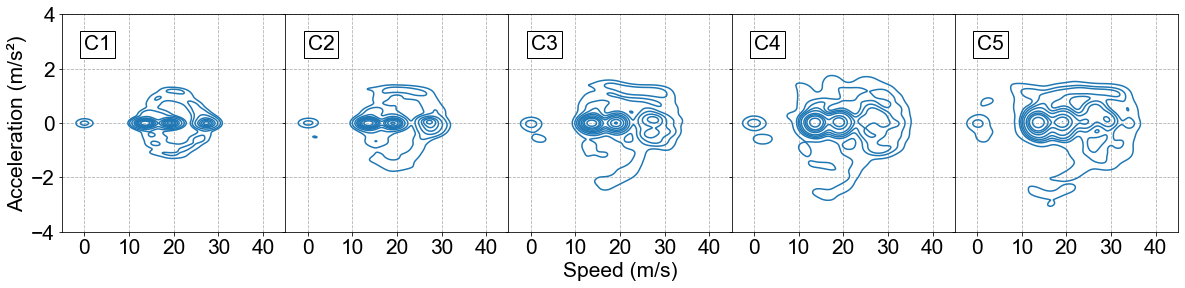

In [33]:
fig, ((ax1), (ax2), (ax3), (ax4), (ax5)) = plt.subplots(1, 5)
fig.set_size_inches(20, 4, forward=True) 
fig.subplots_adjust(wspace=0)

sns.kdeplot(ax=ax1, x=ACC.Speed1, y=ACC.Acc1)
sns.kdeplot(ax=ax2, x=ACC.Speed2, y=ACC.Acc2)
sns.kdeplot(ax=ax3, x=ACC.Speed3, y=ACC.Acc3)
sns.kdeplot(ax=ax4, x=ACC.Speed4, y=ACC.Acc4)
sns.kdeplot(ax=ax5, x=ACC.Speed5, y=ACC.Acc5)

ax1.set_ylim([-4, 4])
ax1.set_ylabel('Acceleration (m/s²)')
ax1.set_xlabel('')
ax1.set_xticks([0, 10, 20, 30, 40])
ax1.set_xlim([-5, 45])
ax1.text(0, 2.7, 'C1', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax1.grid()
ax1.set_axisbelow(True)

ax2.set_ylim([-4, 4])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([0, 10, 20, 30, 40])
ax2.set_xlim([-5, 45])
ax2.text(0, 2.7, 'C2', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax2.grid()
ax2.set_axisbelow(True)

ax3.set_ylim([-4, 4])
ax3.axes.yaxis.set_ticklabels([])
ax3.set_xlabel('Speed (m/s)')
ax3.set_ylabel('')
ax3.set_xticks([0, 10, 20, 30, 40])
ax3.set_xlim([-5, 45])
ax3.text(0, 2.7, 'C3', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax3.grid()
ax3.set_axisbelow(True)

ax4.set_ylim([-4, 4])
ax4.axes.yaxis.set_ticklabels([])
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_xticks([0, 10, 20, 30, 40])
ax4.set_xlim([-5, 45])
ax4.text(0, 2.7, 'C4', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax4.grid()
ax4.set_axisbelow(True)

ax5.set_ylim([-4, 4])
ax5.axes.yaxis.set_ticklabels([])
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_xticks([0, 10, 20, 30, 40])
ax5.set_xlim([-5, 45])
ax5.text(0, 2.7, 'C5', color='k', bbox=dict(facecolor='white', edgecolor='k'))
ax5.grid()
ax5.set_axisbelow(True)

plt.show()

# _Correlation Coefficients_
<hr style="border:1.5px solid black">

In [34]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1] """
    
    bins = []
    for low in range(lower_bound, lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

# Create bins
bins = create_bins(lower_bound=0, width=1, quantity=39)
bins_speed = pd.IntervalIndex.from_tuples(bins)
bins_acceleration = np.array([-4, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1,
                              -3, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, 
                              -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1,
                              -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,
                               0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                               1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                               2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
                               3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 
                               4])

# Sort speed and acceleration values into bins 
list_vehicles = ['1', '2', '3', '4', '5']
for i in list_vehicles:
    HUMAN['categorical_object_Speed{}'.format(i)] = pd.cut(HUMAN['Speed{}'.format(i)], bins_speed)
    HUMAN['categorical_object_Acc{}'.format(i)] = pd.cut(HUMAN['Acc{}'.format(i)], bins_acceleration)
    ACC['categorical_object_Speed{}'.format(i)] = pd.cut(ACC['Speed{}'.format(i)], bins_speed)
    ACC['categorical_object_Acc{}'.format(i)] = pd.cut(ACC['Acc{}'.format(i)], bins_acceleration)
    
C1_HUMAN = HUMAN.groupby('categorical_object_Speed1')['categorical_object_Acc1'].value_counts().sort_index()
C2_HUMAN = HUMAN.groupby('categorical_object_Speed2')['categorical_object_Acc2'].value_counts().sort_index()
C3_HUMAN = HUMAN.groupby('categorical_object_Speed3')['categorical_object_Acc3'].value_counts().sort_index()
C4_HUMAN = HUMAN.groupby('categorical_object_Speed4')['categorical_object_Acc4'].value_counts().sort_index()
C5_HUMAN = HUMAN.groupby('categorical_object_Speed5')['categorical_object_Acc5'].value_counts().sort_index()
    
C1_ACC = ACC.groupby('categorical_object_Speed1')['categorical_object_Acc1'].value_counts().sort_index()
C2_ACC = ACC.groupby('categorical_object_Speed2')['categorical_object_Acc2'].value_counts().sort_index()
C3_ACC = ACC.groupby('categorical_object_Speed3')['categorical_object_Acc3'].value_counts().sort_index()
C4_ACC = ACC.groupby('categorical_object_Speed4')['categorical_object_Acc4'].value_counts().sort_index()
C5_ACC = ACC.groupby('categorical_object_Speed5')['categorical_object_Acc5'].value_counts().sort_index()

# Calculate Pearson correlation coefficients
pearson_coefficient12_HUMAN = np.corrcoef(C1_HUMAN, C2_HUMAN)
pearson_coefficient13_HUMAN = np.corrcoef(C1_HUMAN, C3_HUMAN)
pearson_coefficient14_HUMAN = np.corrcoef(C1_HUMAN, C4_HUMAN)
pearson_coefficient15_HUMAN = np.corrcoef(C1_HUMAN, C5_HUMAN)

pearson_coefficient12_ACC = np.corrcoef(C1_ACC, C2_ACC)
pearson_coefficient13_ACC = np.corrcoef(C1_ACC, C3_ACC)
pearson_coefficient14_ACC = np.corrcoef(C1_ACC, C4_ACC)
pearson_coefficient15_ACC = np.corrcoef(C1_ACC, C5_ACC)

print('Pearson Correlation Coefficients with Human driven vehicles: \n')
print('C1-C2 =', pearson_coefficient12_HUMAN[1][0])
print('C1-C3 =', pearson_coefficient13_HUMAN[1][0])
print('C1-C4 =', pearson_coefficient14_HUMAN[1][0])
print('C1-C5 =', pearson_coefficient15_HUMAN[1][0])

print('\nPearson Correlation Coefficients with ACC-engaged vehicles: \n')
print('C1-C2 =', pearson_coefficient12_ACC[1][0])
print('C1-C3 =', pearson_coefficient13_ACC[1][0])
print('C1-C4 =', pearson_coefficient14_ACC[1][0])
print('C1-C5 =', pearson_coefficient15_ACC[1][0])

Pearson Correlation Coefficients with Human driven vehicles: 

C1-C2 = 0.7699631034374668
C1-C3 = 0.6419604494420321
C1-C4 = 0.5416119420850066
C1-C5 = 0.44258913282548085

Pearson Correlation Coefficients with ACC-engaged vehicles: 

C1-C2 = 0.9214560294276296
C1-C3 = 0.8798768395254228
C1-C4 = 0.7039249198651585
C1-C5 = 0.612014384328037
